In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# 📊 Exploratory Data Analysis: Social Media & Students

## 🔍 Overview
This analysis examines social media usage among students, exploring patterns across different aspects such as academic performance, well-being, and relationships.

## 📈 Average Daily Usage
- What’s the typical daily social media usage among students?
- How do preferences vary across different platforms?

## 🎓 Academic Impact
- Is there a noticeable difference in daily usage hours between students who believe social media affects their academic performance and those who don’t?
- Are there any trends in usage across different academic levels or countries?

## 🛌 Well-being Analysis
- How does average sleep duration correlate with mental health scores?
- Are higher social media usage or addiction levels linked to lower mental health?

## ❤️ Relationships & Conflict
- Do students in relationships experience more conflicts over social media?
- Does the “Complicated” relationship status correlate with higher addiction or conflict scores?

## 🔍 Additional Insights
- Highlighting any surprising or unexpected patterns in the dataset.

In [3]:
df=pd.read_csv("/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

## **The average daily usage of social media among students**

In [5]:
avg_use=df.groupby("Academic_Level")["Avg_Daily_Usage_Hours"].mean()
avg_use

Academic_Level
Graduate         4.776923
High School      5.544444
Undergraduate    5.001416
Name: Avg_Daily_Usage_Hours, dtype: float64

## **Distribution of platform preference**

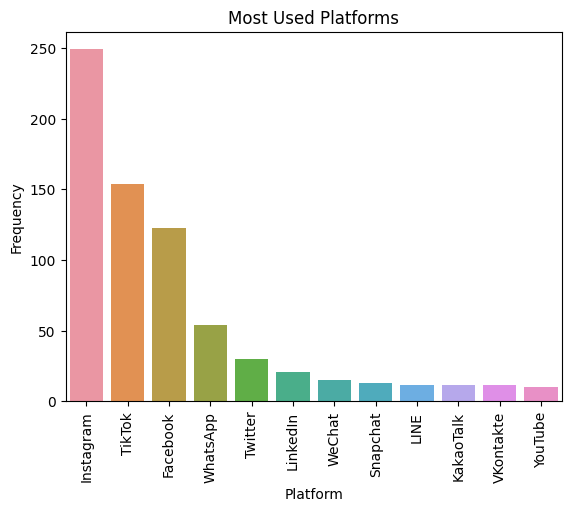

In [6]:
platform_counts = df["Most_Used_Platform"].value_counts()

# Create a bar plot with sorted categories
sns.barplot(x=platform_counts.index, y=platform_counts.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.xlabel("Platform")
plt.ylabel("Frequency")
plt.title("Most Used Platforms")
plt.show()

## **Academic Impact Analysis**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


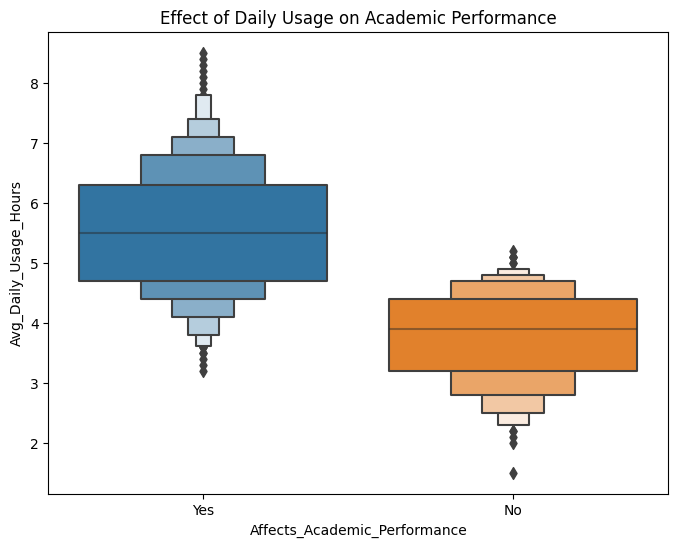

In [7]:
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, x="Affects_Academic_Performance", y="Avg_Daily_Usage_Hours")
plt.title("Effect of Daily Usage on Academic Performance")
plt.show()

## **Highest recorded average daily usage hours**

In [8]:
avg = df.groupby(["Academic_Level", "Country"])["Avg_Daily_Usage_Hours"].max().sort_values(ascending=False)
avg.head()

Academic_Level  Country  
Undergraduate   USA          8.5
Graduate        India        7.5
Undergraduate   India        7.4
Graduate        Mexico       7.3
Undergraduate   Australia    7.2
Name: Avg_Daily_Usage_Hours, dtype: float64

## **Correlation Analysis**

In [9]:
corr=df[["Avg_Daily_Usage_Hours",	"Sleep_Hours_Per_Night",	"Mental_Health_Score",	"Conflicts_Over_Social_Media",	"Addicted_Score"]].corr()
corr

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
Avg_Daily_Usage_Hours,1.000000,-0.790582,-0.801058,0.804582,0.832000
Sleep_Hours_Per_Night,-0.790582,1.000000,0.707439,-0.677266,-0.764858
Mental_Health_Score,-0.801058,0.707439,1.000000,-0.893572,-0.945051
Conflicts_Over_Social_Media,0.804582,-0.677266,-0.893572,1.000000,0.933586
Addicted_Score,0.832000,-0.764858,-0.945051,0.933586,1.000000


<Axes: >

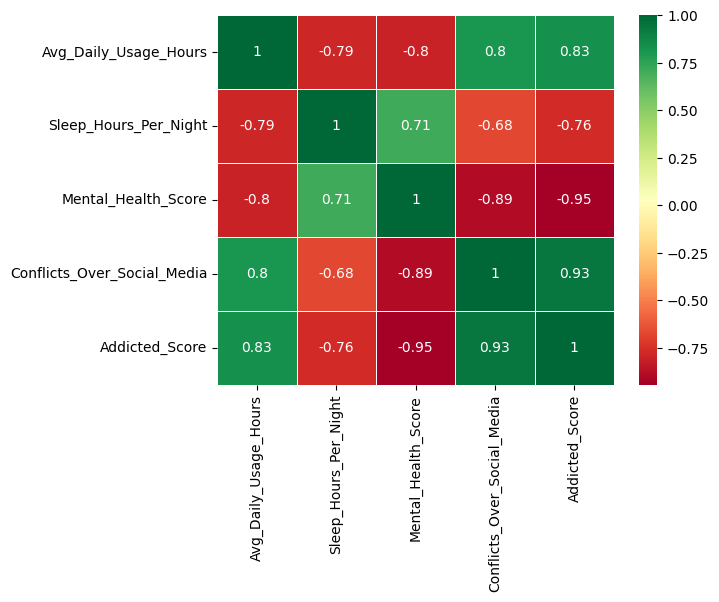

In [10]:
sns.heatmap(corr, annot=True, cmap="RdYlGn", linewidths=0.5)

## **Relationships & Conflict Analysis**

In [11]:
con=df.groupby("Relationship_Status") ["Conflicts_Over_Social_Media"].mean()
con

Relationship_Status
Complicated        3.031250
In Relationship    2.761246
Single             2.901042
Name: Conflicts_Over_Social_Media, dtype: float64

In [12]:
cos=df.groupby("Relationship_Status") ["Addicted_Score"].mean()
cos

Relationship_Status
Complicated        7.031250
In Relationship    6.342561
Single             6.458333
Name: Addicted_Score, dtype: float64

## **Age demographics of social media users**

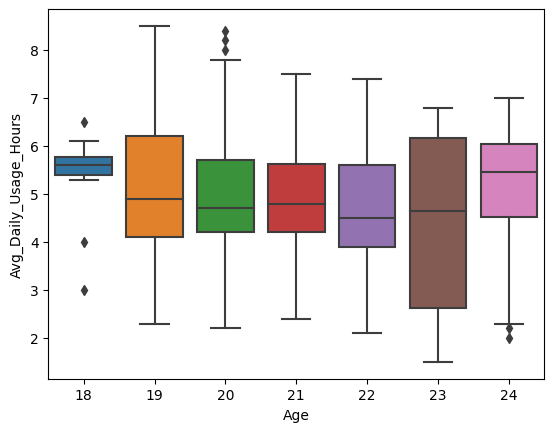

In [13]:
sns.boxplot(data=df, x="Age", y="Avg_Daily_Usage_Hours")
plt.show()